# Resampling Datetime Data (Core)

In [1]:
#Full Name: Hannah Ploutz

## Imports & Load Data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
# import matplotlib.ticker as mticks

import missingno as miss

import seaborn as sns
import numpy as np
import datetime as dt

pd.set_option('display.float_format',lambda x:f"{x:,.2f}")

In [3]:
df = pd.read_excel('Data/london_weather_MODIFIED.xlsx')
df.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.00,7.00,52.00,2.30,-4.10,-7.50,0.40,"101,900.00",9.00
1,19790102,6.00,1.70,27.00,1.60,-2.60,-7.50,0.00,"102,530.00",8.00
2,19790103,5.00,0.00,13.00,1.30,-2.80,-7.20,0.00,"102,050.00",4.00
3,19790104,8.00,0.00,13.00,-0.30,-2.60,-6.50,0.00,"100,840.00",2.00
4,19790105,6.00,2.00,29.00,5.60,-0.80,-1.40,0.00,"102,250.00",1.00


## Tasks

- Part 1: Load the data and create a datetime index

- Part 2: Answer 2 Questions using visualizations and the correct frequency data

## Part 1

**Part 1 - Load the data and make a datetime index.**
1. Convert the date column to datetime dtype.
2. Set the date column as the index.

3. Filter out only the required data:
> 1. Keep only data from the year 2000 or later.
> 2. Keep only the following features:
>> - precipitation
>> - mean_temp
>> - min_temp
>> - max_temp
>> - snow_depth
4. Impute any missing values.
- Think about each feature and what imputation method makes sense. You may not be able to use the same method for every feature!

In [4]:
#covert date column to datetime and formt it with the Y/m/d strfrtime formatter
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')

In [5]:
df.head(1)

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,1979-01-01,2.00,7.00,52.00,2.30,-4.10,-7.50,0.40,"101,900.00",9.00


In [6]:
#set the date column as the index
df = df.set_index("date")
df

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
date,,,,,,,,,
1979-01-01,2.00,7.00,52.00,2.30,-4.10,-7.50,0.40,"101,900.00",9.00
1979-01-02,6.00,1.70,27.00,1.60,-2.60,-7.50,0.00,"102,530.00",8.00
1979-01-03,5.00,0.00,13.00,1.30,-2.80,-7.20,0.00,"102,050.00",4.00
1979-01-04,8.00,0.00,13.00,-0.30,-2.60,-6.50,0.00,"100,840.00",2.00
1979-01-05,6.00,2.00,29.00,5.60,-0.80,-1.40,0.00,"102,250.00",1.00
...,...,...,...,...,...,...,...,...,...
2020-12-27,1.00,0.90,32.00,7.50,7.50,7.60,2.00,"98,000.00",NaN
2020-12-28,7.00,3.70,38.00,3.60,1.10,-1.30,0.20,"97,370.00",NaN
2020-12-29,7.00,0.00,21.00,4.10,2.60,1.10,0.00,"98,830.00",NaN


In [7]:
df.index

DatetimeIndex(['1979-01-01', '1979-01-02', '1979-01-03', '1979-01-04',
               '1979-01-05', '1979-01-06', '1979-01-07', '1979-01-08',
               '1979-01-09', '1979-01-10',
               ...
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='date', length=15341, freq=None)

In [8]:
#keep data from year 2000 and later
df = df.loc[df.index.year > 1999]

In [9]:
df.tail()

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
date,,,,,,,,,
2020-12-27,1.00,0.90,32.00,7.50,7.50,7.60,2.00,"98,000.00",NaN
2020-12-28,7.00,3.70,38.00,3.60,1.10,-1.30,0.20,"97,370.00",NaN
2020-12-29,7.00,0.00,21.00,4.10,2.60,1.10,0.00,"98,830.00",NaN
2020-12-30,6.00,0.40,22.00,5.60,2.70,-0.10,0.00,"100,200.00",NaN
2020-12-31,7.00,1.30,34.00,1.50,-0.80,-3.10,0.00,"100,500.00",NaN


In [10]:
#drop unneeded features
df = df.drop(columns=['cloud_cover','sunshine','global_radiation','pressure'])

In [11]:
df.head(1)

,max_temp,mean_temp,min_temp,precipitation,snow_depth
date,,,,,
2000-01-01,10.80,7.00,4.90,0.00,0.00


In [12]:
#view the missing values as a % per column
(df.isnull().sum() / len(df)) * 100

max_temp         5.08
mean_temp        5.46
min_temp         5.03
precipitation    5.08
snow_depth      22.84
dtype: float64

In [13]:
df.describe()

,max_temp,mean_temp,min_temp,precipitation,snow_depth
count,"7,281.00","7,252.00","7,285.00","7,281.00","5,919.00"
mean,15.81,11.91,8.00,1.72,0.02
std,6.53,5.67,5.24,3.68,0.31
min,-1.20,-4.10,-9.40,0.00,0.00
25%,10.80,7.60,4.10,0.00,0.00
50%,15.60,11.80,8.20,0.00,0.00
75%,20.70,16.40,12.10,1.80,0.00
max,37.90,29.00,22.30,51.60,12.00


#### Impute Missing Values

**Impute for max_temp**

- using strategy: max

**Impute for min_temp**

- using strategy: min

**Impute for precipitation**

- using strategy: mean

**Impute for snow_depth**

- using strategy: mean

In [15]:
#create dictionary for the aggregates I will be doing for each column, resample with Month
agg_dictionary = {'max_temp':'max', 'min_temp':'min', 'precipitation':'mean','snow_depth':'mean'}
df_M = df.resample("MS").agg(agg_dictionary)
df_M

,max_temp,min_temp,precipitation,snow_depth
date,,,,
2000-01-01,12.90,-3.50,0.51,0.00
2000-02-01,13.80,-1.10,2.22,0.00
2000-03-01,16.60,-0.30,0.45,0.00
2000-04-01,18.70,0.30,2.56,0.00
2000-05-01,26.60,5.10,2.36,0.00
...,...,...,...,...
2020-08-01,36.50,8.10,1.56,NaN
2020-09-01,29.60,6.50,0.66,NaN
2020-10-01,18.90,4.90,4.94,NaN


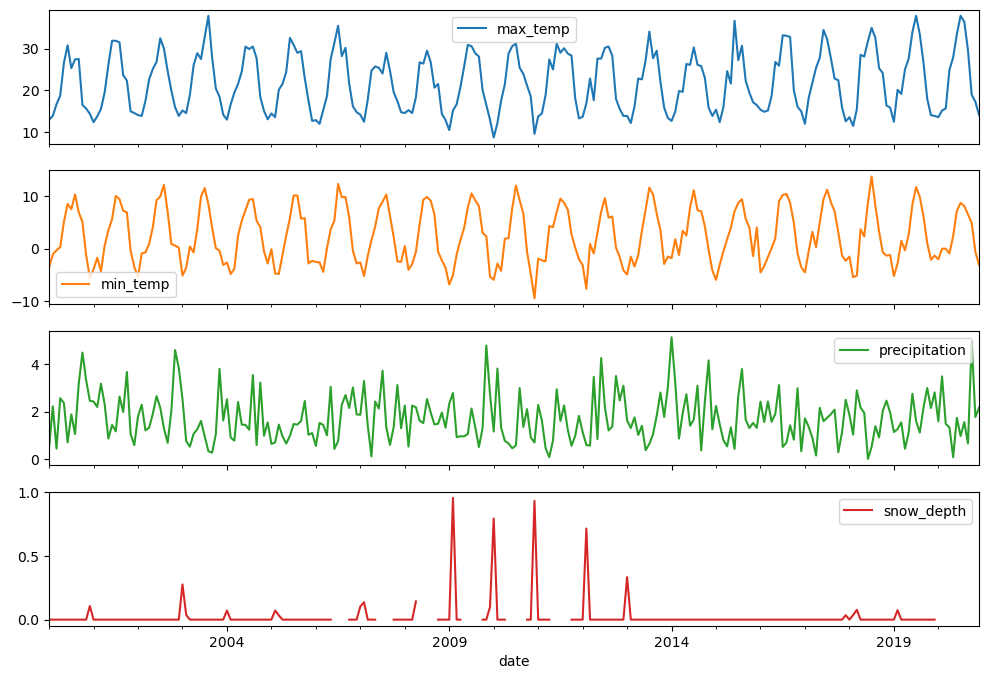

In [16]:
df_M.plot(figsize=(12,8),subplots=True);

In [17]:
df_M.isna().sum()

max_temp          0
min_temp          0
precipitation     0
snow_depth       40
dtype: int64

## Part 2

**Part 2 Answer the Questions with Visualizations (Using the Correct Frequency)**
- For each of the following questions, make a new copy of the dataframe resampled to the correct frequency for the question.
- Plot the feature that the question is asking about.
- If there is a specific time period, plot only that time period.

### Question 1

**Q1: What month had the most precipitation between 2000 through 2010?**
- Resample the data as Monthly frequency.
- Find the date and corresponding value for the max precipitation.
- Plot the feature and time period that corresponds to the question.
- Make sure to meet the "Visualization Requirements" below!
- Determine the date and value for the most precipitation (the max precipitation).
- Add a vertical line at this date with a label that says the date (using date format: "April 2000") and the max precipitation value.
- Make sure to add a legend so that your label is visible.

**Q1 Visualization Requirements** 
- Use a combination of pandas, matplotlib tick formatters, tick locators, and the fig.autofmt_xdate method to:

Create a wide figure (e.g. figsize=(12,3))
- With the title "Precipitation for 2000-2010"
- With a ylabel of "Inches"

Customize the major xaxis ticks to:
- Have major xaxis ticks every 1 year.
- Use 4-digit years for the labels
- Rotate the major ticks' labels 90 degrees.

Customize the minor xaxis ticks to:
- Have minor xaxis ticks every 3 months
- Do not label the minor ticks.

### Question 2

**Q2: Which year between 2000-2020 had the coolest average temperature?**
- Resample the data as Yearly frequency.

- Plot the feature and time period that corresponds to the question.
- Make sure to meet the "Visualization Requirements" below!
- Determine the date and value for the lowest mean temp.
- Add a vertical line at this date with a label that says the date (using date format: "2000") and the lowest mean temperature value.

**Q2 Visualization Requirements**
Use a combination of pandas, matplotlib tick formatters, tick locators, and the fig.autofmt_xdate method to:

Create a wide figure (e.g. figsize=(12,3))
- With the title "Average Temperature"
- With a ylabel of "Degrees"

Customize the major xaxis ticks to:
- Have major xaxis ticks every 5 years.
- Use 4-digit years for the labels
- Rotate the major ticks' labels 90 degrees.

Customize the minor xaxis ticks to:
- Have minor xaxis ticks every 1 year
- Do not label the minor ticks.
